# PRESELECCIÓN DE VARIABLES

## 1. IMPORTAR PAQUETES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [5]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/001_LEAD SCORING'

Nombres de los ficheros de datos.

In [6]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [7]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

## 3. MÉTODOS SUPERVISADOS

In [29]:
df = df.set_index('id')
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.296655,0.15625,0.666667,0.444444,0
660727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.04,0.674296,0.12500,0.555556,1.000000,1
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.06250,0.444444,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.06250,0.666667,0.777778,1
660673,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.721831,0.12500,0.555556,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579642,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.779049,0.12500,0.555556,1.000000,0
579622,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.26,0.620158,0.16250,0.555556,0.666667,1
579546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.104754,0.12500,0.555556,0.888889,0


### 3.1. Preparar x e y

In [48]:
target = 'compra'
target = target
x = df.drop(columns = target).copy()
y =  df[target].copy()

### 3.2. Mutual Information

#### 3.2.1. Crear una función para mostrar el resultado

In [49]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### 3.2.2. Calcular y revisar

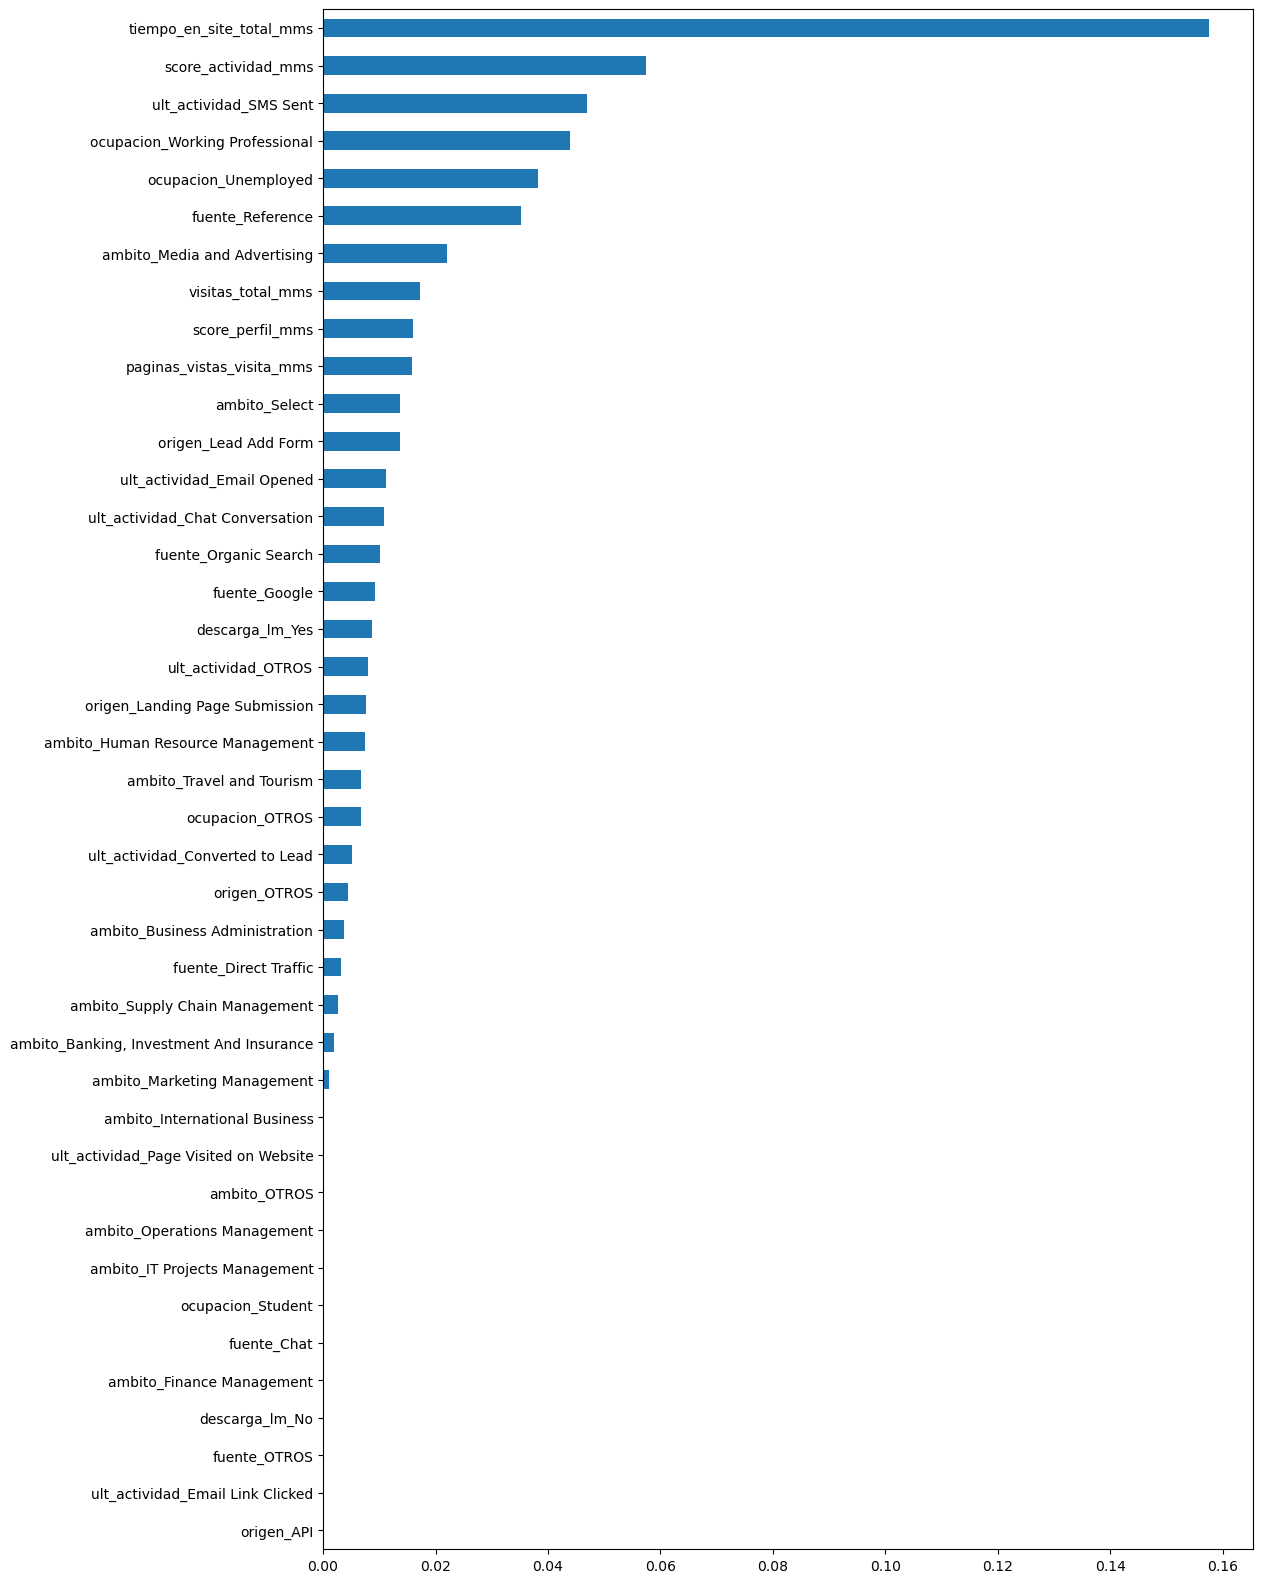

In [50]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [51]:
rank_mi = ranking_mi(mutual_selector)
rank_mi

,variable,importancia_mi,ranking_mi
37,tiempo_en_site_total_mms,0.157516,0
39,score_actividad_mms,0.057465,1
16,ult_actividad_SMS Sent,0.046959,2
33,ocupacion_Working Professional,0.043877,3
32,ocupacion_Unemployed,0.038241,4
9,fuente_Reference,0.035166,5
24,ambito_Media and Advertising,0.021987,6
36,visitas_total_mms,0.017210,7
40,score_perfil_mms,0.016029,8
38,paginas_vistas_visita_mms,0.015755,9


#### 3.2.3. Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [52]:
posicion_variable_limite = 12

##### Extraer los nombres de las que entran

In [53]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

In [54]:
entran_mi

37          tiempo_en_site_total_mms
39               score_actividad_mms
16            ult_actividad_SMS Sent
33    ocupacion_Working Professional
32              ocupacion_Unemployed
9                   fuente_Reference
24      ambito_Media and Advertising
36                 visitas_total_mms
40                  score_perfil_mms
38         paginas_vistas_visita_mms
27                     ambito_Select
2               origen_Lead Add Form
Name: variable, dtype: object

##### Crear el dataframe con la selección

In [55]:
x_mi = x[entran_mi].copy()

### 3.3. Recursive Feature Elimination

#### 3.3.1. Instanciar

In [56]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

#### 3.3.2. Entrenar

In [57]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, random_state=None, ...))

##### Extraer los nombres de las que entran

In [58]:
entran_rfe = x.columns[rfe.support_]

#### 3.3.3. Crear el dataframe con la selección

In [59]:
x_rfe = x[entran_rfe].copy()

### 3.4. Permutation Importance

#### 3.4.1. Crear una función para mostrar el resultado

In [62]:
def ranking_per(predictoras,permutxacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### 3.4.2. Instanciar y entrenar

In [63]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')
xgb = XGBClassifier(n_jobs = -1, eval_metric='auc')
xgb.fit(x,y)
permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

#### 3.4.3. Revisar la salida

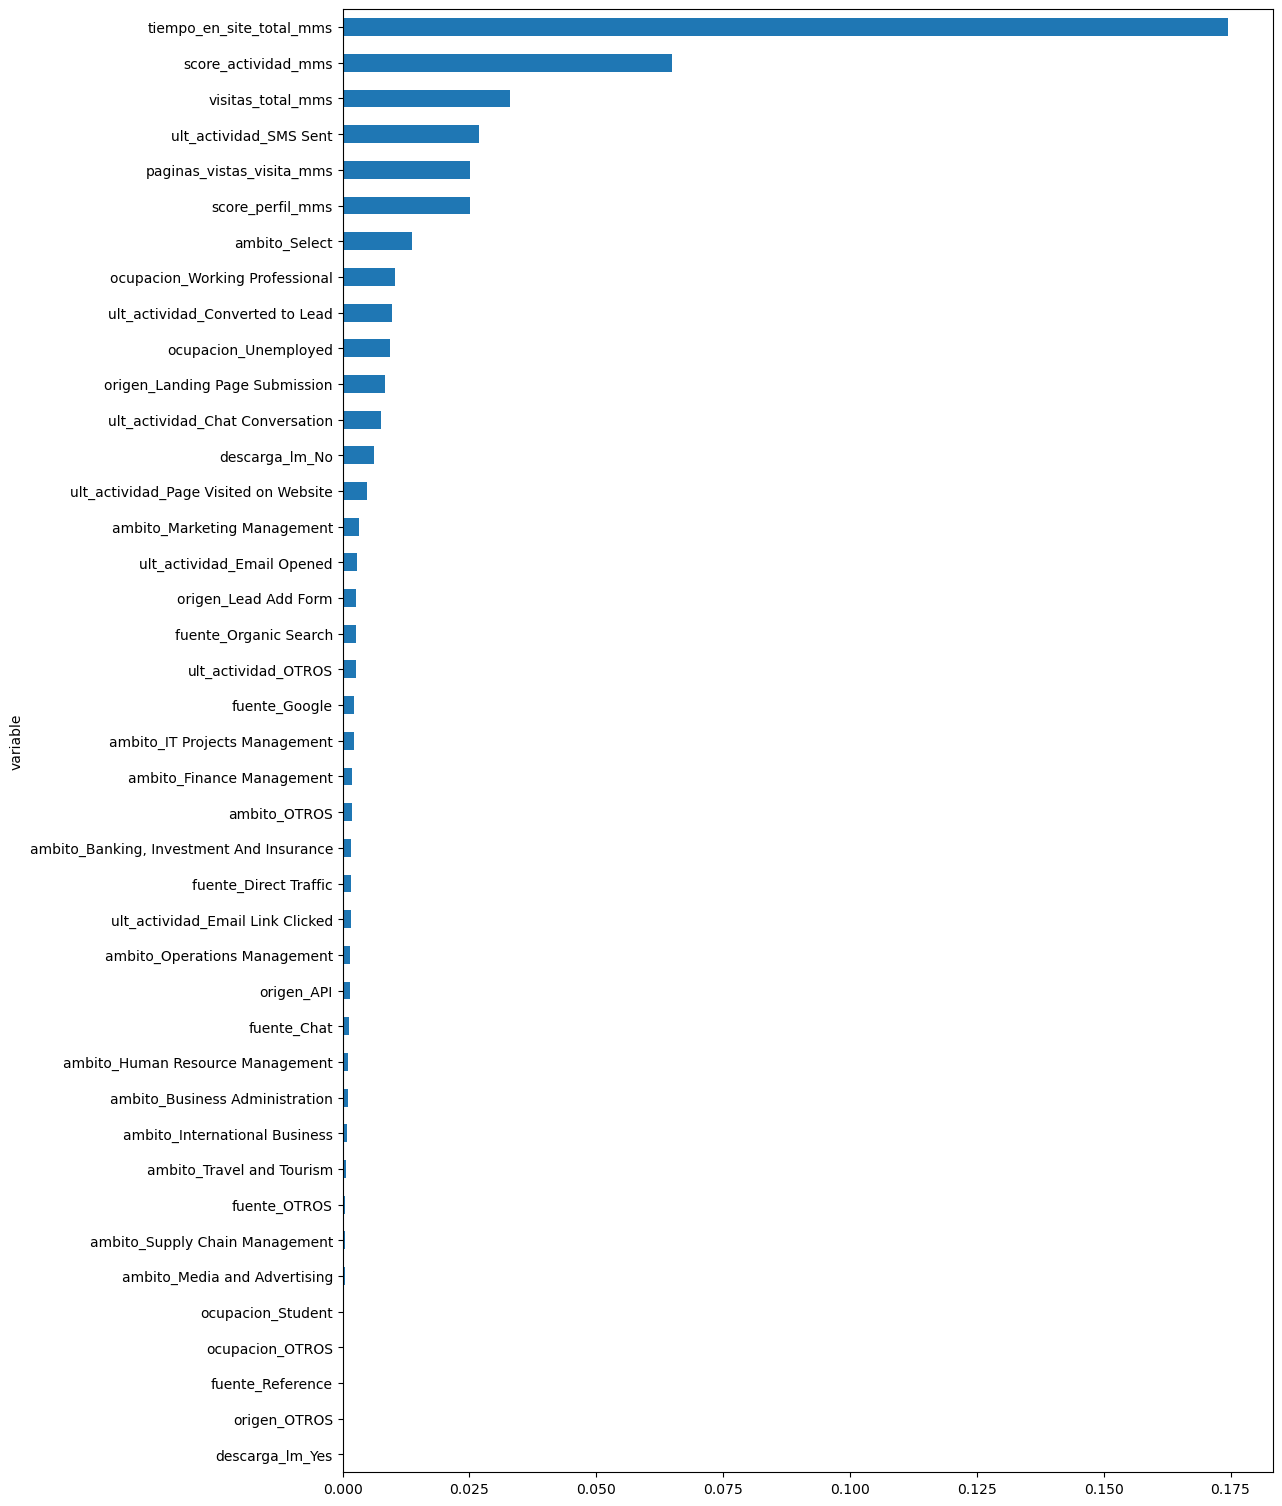

In [64]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,19));

#### 3.4.4. Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [65]:
posicion_variable_limite = 8

##### Extraer los nombres de las que entran

In [66]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [67]:
x_per = x[entran_per].copy()

### 3.5. SUPER RANKING

Otra forma es hacer los métodos y despues un SUPER RANKING para hacer la selección

In [68]:
#PASO 1. Preparar x e y. Cuidado si no se ha definido la target previamente
target = target
x = df.drop(columns = target).copy()
y = df[target].copy()

#PASO 2. MÉTODOS PRESELECCION
#Método 1. MUTUAL INFORMATION
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)
mutual_selector = mutual_info_classif(x,y)
x_mi = ranking_mi(mutual_selector)
x_mi

#Método 2. RECURSIVE FEATURE ELIMINATION SIN validación cruzada
rfe = RFE(estimator = XGBClassifier(n_jobs = -1, eval_metric='auc'))
rfe.fit(x,y)
#Ranking. Las 1 son las que él seleccionaría para maximizar la métrica.
rfe.ranking_
#Dataframe de variable y ranking
x_rfe = pd.DataFrame({'variable': x.columns, 'ranking_rfe': rfe.ranking_}).sort_values(by = 'ranking_rfe')

#Método 3. PERMUTATION IMPORTANCE
xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')
xgb.fit(x,y)
permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',#Metrica regresión o clasificación
                                     n_repeats=5, n_jobs = -1)
#Creamos una función que nos genere un dataframe con la importancia y una columna de ranking.
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)
x_per = ranking_per(x,permutacion)
x_per

#PASO 3. SUPER RANKING
#Función para unir todas los métodos anteriores en un solo dataframe
def ranking_tot(x_mi, x_rfe, x_per):
    ranking_tot = pd.merge(pd.merge(x_mi, x_rfe), x_per)
    ranking_tot['puntos'] = ranking_tot.ranking_mi + ranking_tot.ranking_rfe + ranking_tot.ranking_per
    ranking_tot.sort_values(by = 'puntos', inplace=True)
    ranking_tot['ranking_tot'] = range(0,len(ranking_tot.variable))
    return(ranking_tot)
super_ranking = ranking_tot(x_mi, x_rfe, x_per)
super_ranking
#Seleccionamos el número de las variables con las que queremos trabajar. Ej. [0:20]
x_sr = x[ranking_tot(x_mi, x_rfe, x_per)[0:20].variable].copy()
x_sr

#Gráfico 20 primeras variables según los puntos
#super_ranking.set_index('variable').puntos.sort_values(ascending = False).plot.barh(figsize = (8,10));
#Gráfico 20 primeras variables según el ranking_tot
#super_ranking.set_index('variable').ranking_tot[0:20].sort_values(ascending = False).plot.barh(figsize = (8,10));

#Despues de este proceso haríamos la modelización de ML para predecir resultados

,tiempo_en_site_total_mms,score_actividad_mms,ocupacion_Working Professional,visitas_total_mms,ocupacion_Unemployed,ult_actividad_SMS Sent,ambito_Select,score_perfil_mms,paginas_vistas_visita_mms,ult_actividad_Converted to Lead,origen_Lead Add Form,ult_actividad_Chat Conversation,origen_Landing Page Submission,descarga_lm_No,ambito_IT Projects Management,fuente_Google,ult_actividad_Email Opened,ult_actividad_OTROS,fuente_Chat,fuente_Reference
id,,,,,,,,,,,,,,,,,,,,
660728,0.296655,0.666667,0.0,0.10,1.0,0.0,1.0,0.444444,0.15625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
660727,0.674296,0.555556,0.0,0.04,0.0,0.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
660719,0.134243,0.444444,0.0,0.02,1.0,0.0,0.0,0.666667,0.06250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
660681,0.628521,0.666667,0.0,0.04,1.0,0.0,1.0,0.777778,0.06250,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
660673,0.721831,0.555556,0.0,0.04,1.0,0.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579642,0.779049,0.555556,0.0,0.04,1.0,1.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579622,0.620158,0.555556,0.0,0.26,1.0,1.0,1.0,0.666667,0.16250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
579546,0.104754,0.555556,0.0,0.04,1.0,1.0,0.0,0.888889,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


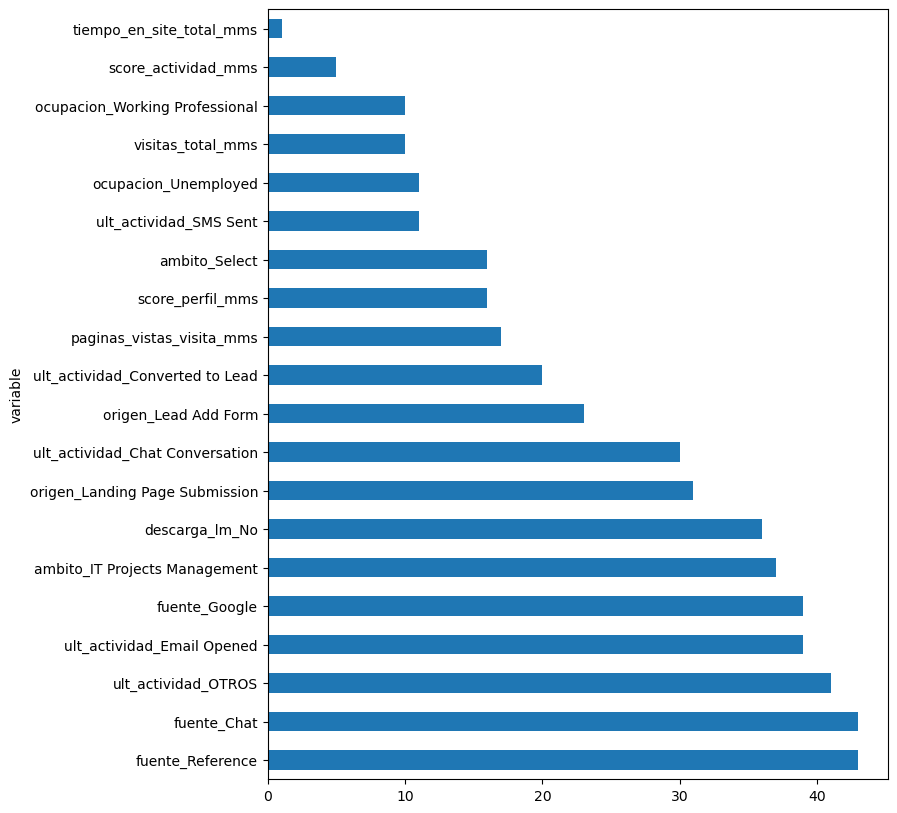

In [69]:
super_ranking.set_index('variable').puntos[0:20].sort_values(ascending = False).plot.barh(figsize = (8,10));

## 4. SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [71]:
# x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per
x_preseleccionado = x_sr

In [72]:
x_sr

,tiempo_en_site_total_mms,score_actividad_mms,ocupacion_Working Professional,visitas_total_mms,ocupacion_Unemployed,ult_actividad_SMS Sent,ambito_Select,score_perfil_mms,paginas_vistas_visita_mms,ult_actividad_Converted to Lead,origen_Lead Add Form,ult_actividad_Chat Conversation,origen_Landing Page Submission,descarga_lm_No,ambito_IT Projects Management,fuente_Google,ult_actividad_Email Opened,ult_actividad_OTROS,fuente_Chat,fuente_Reference
id,,,,,,,,,,,,,,,,,,,,
660728,0.296655,0.666667,0.0,0.10,1.0,0.0,1.0,0.444444,0.15625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
660727,0.674296,0.555556,0.0,0.04,0.0,0.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
660719,0.134243,0.444444,0.0,0.02,1.0,0.0,0.0,0.666667,0.06250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
660681,0.628521,0.666667,0.0,0.04,1.0,0.0,1.0,0.777778,0.06250,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
660673,0.721831,0.555556,0.0,0.04,1.0,0.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579642,0.779049,0.555556,0.0,0.04,1.0,1.0,0.0,1.000000,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579622,0.620158,0.555556,0.0,0.26,1.0,1.0,1.0,0.666667,0.16250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
579546,0.104754,0.555556,0.0,0.04,1.0,1.0,0.0,0.888889,0.12500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. MÉTODOS NO SUPERVISADOS

### 5.1. Correlación

#### 5.1.1. Crear una función para mostrar el resultado

In [96]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### 5.1.2. Calcular y revisar

##### Calcular

In [97]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [75]:
#Número de veces que var1 aparece en relacion con diferentes variables. Ej. var1//variacion_tasa_empleo_bin_rs = 6 veces
cor_finales.var1.value_counts()

var1
origen_Landing Page Submission    5
score_perfil_mms                  2
fuente_Reference                  1
ocupacion_Working Professional    1
ult_actividad_Email Opened        1
visitas_total_mms                 1
fuente_Google                     1
descarga_lm_No                    1
Name: count, dtype: int64

##### Revisar detalle

In [76]:
#Opciones si hay muchas variables con altas correlaciones:
#1. Rehacer el reescalado porque se ha hecho mas de un proceso sobre la misma variable (04_Plantilla Transformacion de datos)
#2. Usar algoritmos como los árboles de decisión o Random Forest que no les afectan las correlaciones entre variables
cor_finales.head(40)

,var1,var2,corr
390,fuente_Reference,origen_Lead Add Form,0.963610
44,ocupacion_Working Professional,ocupacion_Unemployed,0.855457
246,origen_Landing Page Submission,ambito_Select,0.692440
325,ult_actividad_Email Opened,ult_actividad_SMS Sent,0.567179
68,visitas_total_mms,paginas_vistas_visita_mms,0.565512
253,origen_Landing Page Submission,descarga_lm_No,0.504915
313,fuente_Google,descarga_lm_No,0.461392
266,descarga_lm_No,ambito_Select,0.440984
146,score_perfil_mms,ambito_Select,0.396324
152,score_perfil_mms,origen_Landing Page Submission,0.389475


In [77]:
max_correlacion = 0.96
exceso_correlacion = cor_finales.var1.loc[cor_finales['corr']>=max_correlacion].to_list()
exceso_correlacion

['fuente_Reference']

#### 5.1.3. Filtrar variables

Automáticamente se descartarán las variables que hayan superado la correlación máxima que hayamos definido y se generará una lista con el resto de las variables

In [90]:
a_eliminar_corr = ['origen_Landing Page Submission']

In [92]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [93]:
x_preseleccionado.columns.to_list()

['tiempo_en_site_total_mms',
 'score_actividad_mms',
 'ocupacion_Working Professional',
 'visitas_total_mms',
 'ocupacion_Unemployed',
 'ult_actividad_SMS Sent',
 'ambito_Select',
 'score_perfil_mms',
 'paginas_vistas_visita_mms',
 'ult_actividad_Converted to Lead',
 'origen_Lead Add Form',
 'ult_actividad_Chat Conversation',
 'descarga_lm_No',
 'ambito_IT Projects Management',
 'fuente_Google',
 'ult_actividad_Email Opened',
 'ult_actividad_OTROS',
 'fuente_Chat']

In [98]:
#Calculamos las correlaciones nuevamente después de eliminar las variables para comprobar que ya no hay correlaciones fuertes

def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

cor_finales = correlaciones_fuertes(x_preseleccionado)

#Número de veces que var1 aparece en relacion con diferentes variables. Ej. var1//variacion_tasa_empleo_bin_rs = 6 veces
cor_finales.var1.value_counts()

var1
ambito_Select                     2
ocupacion_Working Professional    1
ult_actividad_SMS Sent            1
visitas_total_mms                 1
descarga_lm_No                    1
Name: count, dtype: int64

## 6. GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [99]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [100]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [101]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)

In [102]:
x_preseleccionado.shape

(4817, 18)